In [34]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, classification_report
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
import tensorflow
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from micromlgen import port

In [35]:
RANDOM_SEED = 42

In [36]:
np.random.seed(RANDOM_SEED)
tensorflow.set_random_seed(RANDOM_SEED)

In [37]:
with open('data/X_paper.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y_paper.pkl', 'rb') as f:
    y = pickle.load(f)

In [38]:
X.shape

(1350, 5)

In [39]:
X = np.concatenate((X[:250], X[750:1000], X[1500:]), axis=0)
y = np.concatenate((y[:250], y[750:1000], y[1500:]), axis=0)

Split in train and test sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review 

In [41]:
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values

In [42]:
y_train

array([5, 1, 4, 4, 5, 4, 5, 1, 4, 0, 5, 1, 4, 0, 4, 0, 4, 4, 1, 0, 0, 4,
       0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1,
       5, 5, 0, 4, 1, 4, 5, 1, 0, 0, 1, 4, 0, 4, 0, 4, 1, 1, 1, 4, 1, 0,
       4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 5, 0, 5, 4, 0, 4, 4, 1, 0, 0, 5,
       0, 4, 4, 4, 4, 5, 4, 1, 1, 1, 5, 0, 1, 4, 1, 1, 4, 1, 4, 4, 4, 0,
       5, 4, 4, 4, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 4, 4, 4, 1, 4, 0, 1, 4,
       5, 1, 0, 0, 5, 0, 1, 4, 0, 4, 1, 4, 4, 0, 1, 4, 4, 4, 0, 5, 4, 0,
       0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 5, 0, 0, 5, 1, 4, 5,
       0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 5, 4, 0, 0, 4, 4, 0, 0, 0, 4,
       1, 4, 1, 5, 0, 4, 5, 0, 4, 1, 4, 1, 4, 4, 4, 1, 5, 0, 5, 0, 1, 0,
       4, 4, 5, 4, 0, 4, 0, 4, 1, 4, 4, 0, 1, 0, 5, 4, 5, 4, 4, 4, 4, 0,
       0, 0, 4, 4, 1, 1, 0, 0, 4, 0, 4, 1, 0, 1, 5, 5, 4, 4, 4, 4, 0, 1,
       4, 1, 4, 5, 4, 1, 0, 1, 4, 0, 1, 0, 4, 4, 5, 4, 1, 1, 4, 4, 4, 0,
       1, 1, 4, 4, 0, 1, 4, 1, 1, 1, 0, 0, 1, 4, 4,

In [43]:
X_train.shape[1]

5

## Models Evaluation

### RF

In [44]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
#model = MLPClassifier(random_state=42)

In [45]:
model.fit(X_train, y_train)

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [46]:
y_pred = model.predict(X_test)

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [47]:
f1_score(y_test, y_pred, average="weighted")

0.762791461412151

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.86      0.95      0.90        20
           4       0.74      0.88      0.80        40
           5       0.00      0.00      0.00        10

    accuracy                           0.80       100
   macro avg       0.62      0.67      0.64       100
weighted avg       0.73      0.80      0.76       100



In [16]:
print(confusion_matrix(y_test, y_pred))

[[26  1  2  1]
 [ 0 19  1  0]
 [ 3  2 35  0]
 [ 1  0  9  0]]


In [17]:
with open('rf_model_paper_3.h', 'w') as f:  # change path if needed
    f.write(port(model, optimize=False))

In [18]:
with open('models/rf_model_paper_3.pkl', 'wb') as f:
    pickle.dump(model, f)


### MLP

In [ ]:
# design network

model = Sequential()
model.add(Dense(5, activation='relu', input_dim=5))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [21]:
opt = Adam(lr=1e-5, decay=1e-5)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
# fit network
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=16, validation_split=0.25, verbose=1, shuffle=True)

Train on 300 samples, validate on 100 samples
Epoch 1/100
300/300 [==============================] - 0s 928us/step - loss: 0.6607 - acc: 0.2267 - val_loss: 0.6495 - val_acc: 0.2300
Epoch 2/100
300/300 [==============================] - 0s 104us/step - loss: 0.6253 - acc: 0.2200 - val_loss: 0.6195 - val_acc: 0.2300
Epoch 3/100
300/300 [==============================] - 0s 43us/step - loss: 0.5905 - acc: 0.2200 - val_loss: 0.5897 - val_acc: 0.2300
Epoch 4/100
300/300 [==============================] - 0s 114us/step - loss: 0.5562 - acc: 0.2200 - val_loss: 0.5597 - val_acc: 0.2300
Epoch 5/100
300/300 [==============================] - 0s 69us/step - loss: 0.5217 - acc: 0.2200 - val_loss: 0.5305 - val_acc: 0.2300
Epoch 6/100
300/300 [==============================] - 0s 69us/step - loss: 0.4880 - acc: 0.2200 - val_loss: 0.5009 - val_acc: 0.2300
Epoch 7/100
300/300 [==============================] - 0s 53us/step - loss: 0.4531 - acc: 0.2200 - val_loss: 0.4729 - val_acc: 0.2300
Epoch 8/100
3

In [23]:
model.save('models/rnn-cnn')

ImportError: `save_model` requires h5py.

In [24]:
with open('models/rnn-cnn-history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

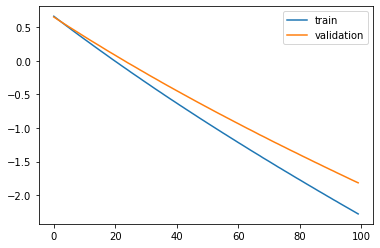

In [25]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [26]:
# make a prediction
y_pred = model.predict(X_test)

In [27]:
np.argmax(y_pred, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
f1_score(y_test, np.argmax(y_pred, axis=1), average="weighted")

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.13846153846153844

In [30]:
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.30      1.00      0.46        30
           1       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        10

    accuracy                           0.30       100
   macro avg       0.07      0.25      0.12       100
weighted avg       0.09      0.30      0.14       100



In [31]:
print(confusion_matrix(y_test, y_pred.argmax(axis=1)))

[[30  0  0  0]
 [20  0  0  0]
 [40  0  0  0]
 [10  0  0  0]]
